# Unit 5 - Financial Planning

In [ ]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import warnings


%matplotlib inline

In [6]:
# For presentation purposes, this step is to suppress an extremely long performance warning when MC Sim runs 
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

# Load .env enviroment variables
load_dotenv("alpaca.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [9]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url)
btc_data = response_btc_data.json()
print(json.dumps(btc_data, indent=4))

# Fetch current ETH price
response_eth_data = requests.get(eth_url)
eth_data = response_eth_data.json()
print(json.dumps(eth_data, indent=4))

# Compute current value of my crpto
my_btc_value = my_btc * btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19351762,
            "total_supply": 19351762,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 28165.0,
                    "volume_24h": 23337557442,
                    "market_cap": 545042009783,
                    "percentage_change_1h": -0.503342807181926,
                    "percentage_change_24h": -3.77337785273974,
                    "percentage_change_7d": -5.81577578405928,
                    "percent_change_1h": -0.503342807181926,
                    "percent_change_24h": -3.77337785273974,
                    "percent_change_7d": -5.81577578405928
                }
            },
            "last_updated": 1682020191
        }
    },
    "metadata": {
        "timestamp": 1682020191,
        "num_c

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_portfolio[df_portfolio["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=["AGG","SPY"])

# Preview DataFrame
df_portfolio

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.28  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [14]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value
asset = {"amount":[total_crypto_value, total_shares_value]} 

# Create savings DataFrame
df_savings = pd.DataFrame(asset, index =["crypto", "stock/bond"]) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,44024.456
stock/bond,40614.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

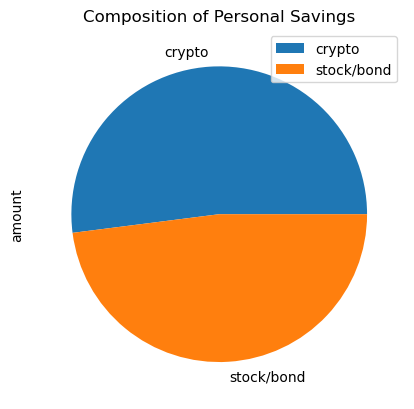

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount", title = "Composition of Personal Savings")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value 

# Validate saving health
if emergency_fund < total_savings:
    print("Congratulations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
    print("Congratulations! You have reached emergency fund goal.")
else:
    print(f"You are ${emergency_fund - total_savings} away from emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
MC_sim.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008790,0.995005,1.004917,1.009599,1.009212,0.999169,0.996657,0.997813,0.998910,1.001057,...,1.006004,0.989719,0.992556,0.998003,1.005614,1.007245,1.007709,1.007986,1.007893,1.002733
2,1.010320,0.992079,0.998792,1.009483,1.012842,1.008369,1.011949,0.995625,0.990042,1.004608,...,1.005045,0.989756,1.005752,0.998770,1.004742,1.001106,1.010245,1.032377,1.004216,1.015902
3,1.014336,0.995570,1.000821,1.001738,1.010162,1.014753,1.005910,0.994682,0.995205,1.008349,...,1.014772,0.990246,1.001774,1.004096,1.018623,0.987842,1.001029,1.029941,1.003291,1.017188
4,1.016912,1.004746,1.015450,0.997406,1.009124,1.018228,1.011752,0.983387,0.990894,1.004234,...,1.017270,0.990848,1.011481,1.005501,1.023222,0.978566,0.991938,1.026835,0.994639,1.004479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.432957,11.053199,15.522887,21.853462,12.905048,17.675679,26.533325,21.903776,9.701606,9.625372,...,11.633410,33.214609,11.876538,7.271712,36.939065,17.160766,15.119208,7.492422,7.996481,16.444391
7557,16.473739,11.158566,15.549349,21.689298,12.840546,17.406235,26.716987,21.841972,9.786727,9.591179,...,11.593875,33.133203,11.986197,7.272907,37.487443,17.440574,15.214905,7.566581,7.967587,16.477599
7558,16.456163,11.115081,15.490573,21.855648,12.869878,17.364063,26.622496,21.906044,9.737613,9.549545,...,11.447663,33.014813,12.159266,7.252177,37.158363,17.518005,15.266858,7.539649,8.011700,16.610182
7559,16.455242,11.092294,15.485873,21.479935,12.818534,17.376964,26.776828,21.980356,9.700346,9.524064,...,11.455474,33.171232,12.158979,7.172169,36.813566,17.500784,15.349932,7.525501,8.035376,16.608358


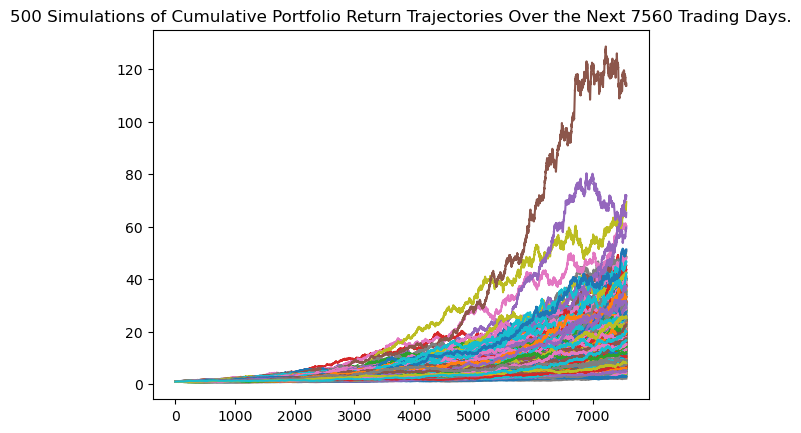

In [26]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

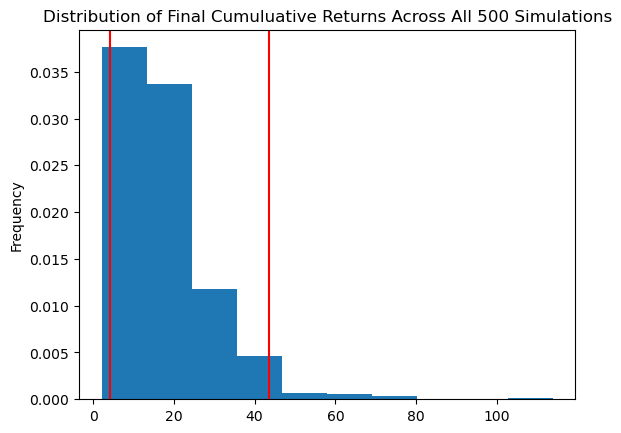

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             17.775693
std              11.506037
min               2.130517
25%              10.120891
50%              15.218438
75%              22.279140
max             113.793516
95% CI Lower      4.190038
95% CI Upper     43.604241
Name: 7560, dtype: float64


/Users/kyle/Documents/bootcamp/Financial-Planning/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83800.75 and $872084.81


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $125701.13 and $1308127.22


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_dist_five.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997569,1.006478,1.013400,0.999461,0.992229,0.998663,0.997299,1.002793,0.995352,0.995362,...,0.996102,0.998564,1.002058,0.997668,1.005668,0.995515,0.991389,0.999939,0.995057,1.007131
2,0.992143,1.005495,1.010957,0.992676,0.986654,1.008996,1.002795,1.000351,1.007694,0.999937,...,1.010062,1.013136,0.999606,0.993102,0.999405,0.985423,0.984658,0.995672,0.995732,1.002732
3,0.982372,0.997147,1.017976,0.991341,0.986332,1.008523,1.001127,0.988182,1.016180,1.003920,...,1.007405,1.020060,1.007300,0.992874,0.996192,0.987721,0.980840,0.985763,0.998724,0.998506
4,0.977825,1.003420,1.012444,0.977687,0.993241,1.000367,1.004779,0.973874,1.022101,0.999829,...,1.003711,1.026145,1.017877,1.008599,0.986695,0.987724,0.988085,0.986995,0.994152,0.993261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.226649,2.026501,1.888178,1.383391,1.846138,1.671328,1.603728,2.354353,2.193617,1.595120,...,1.401912,1.618371,1.786408,1.438192,2.246004,1.788109,1.154310,2.153581,1.585742,1.790122
1257,1.224779,2.013666,1.901588,1.379531,1.818405,1.667033,1.608032,2.356157,2.190397,1.598462,...,1.413488,1.615480,1.799592,1.424244,2.237718,1.795701,1.163730,2.112828,1.591095,1.795404
1258,1.230033,2.019079,1.916963,1.392604,1.816790,1.659462,1.612739,2.346474,2.190744,1.592500,...,1.394670,1.633293,1.801322,1.439694,2.245191,1.793882,1.159823,2.141137,1.582103,1.823152
1259,1.232053,2.001266,1.917302,1.387720,1.812425,1.645251,1.621439,2.344441,2.210374,1.599960,...,1.396450,1.647103,1.788317,1.427927,2.246065,1.797198,1.157952,2.170323,1.571804,1.810191


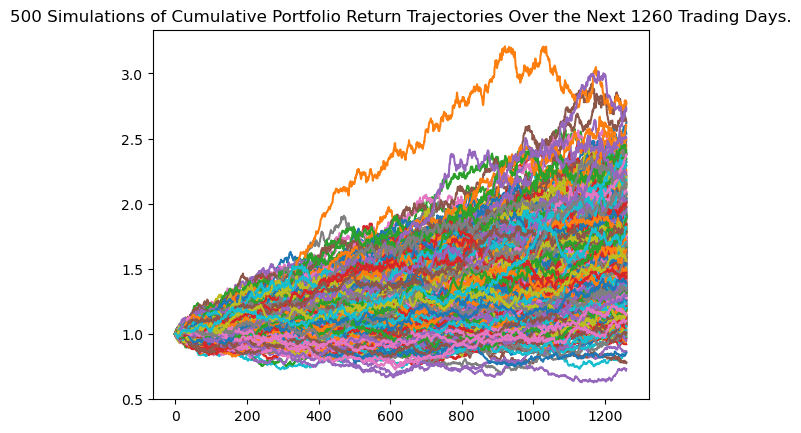

In [34]:
# Plot simulation outcomes
line_plot_five = MC_dist_five.plot_simulation()

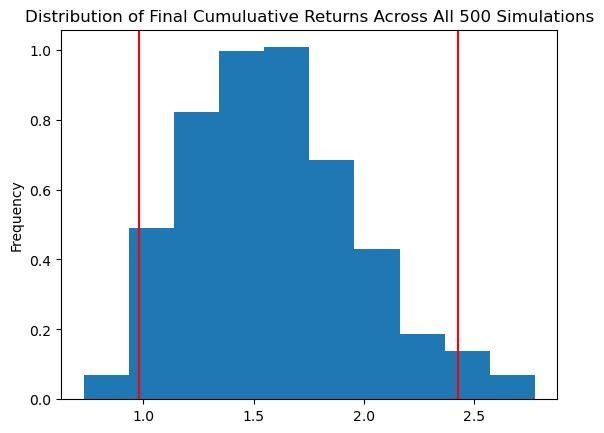

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_dist_five.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_dist_five.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.592822
std               0.381671
min               0.729878
25%               1.325462
50%               1.569810
75%               1.835393
max               2.775665
95% CI Lower      0.981420
95% CI Upper      2.425704
Name: 1260, dtype: float64


/Users/kyle/Documents/bootcamp/Financial-Planning/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [37]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*60000,2)
ci_upper_five = round(tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58885.22 and $145542.24


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_dist_ten.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992779,0.999008,0.997442,0.990478,0.995317,1.009159,1.007646,1.005864,1.013104,0.996986,...,0.997898,0.985963,0.988984,1.006308,1.007302,0.988396,0.993903,0.980777,1.003008,1.007749
2,0.991977,0.997101,0.987100,0.998569,0.983620,1.011590,1.003085,1.018783,1.014826,1.001888,...,1.003054,0.976272,0.992781,1.014339,1.029592,0.991938,0.989071,0.978407,0.997210,1.001806
3,0.986017,0.980942,0.990221,1.003625,0.981839,1.014372,0.991579,1.025133,1.006323,1.013214,...,1.001440,0.971764,1.002191,1.013873,1.026767,0.989150,0.969603,0.971840,0.985753,0.994596
4,0.995730,0.984551,0.990519,1.005860,0.995043,1.015750,0.985263,1.028110,0.992480,1.031911,...,1.007779,0.965529,1.000711,1.016885,1.025255,0.987287,0.966426,0.968784,1.005969,0.987239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.364740,3.008587,1.959207,3.669450,2.573162,2.468974,1.547640,4.344269,3.074529,2.017466,...,2.512917,3.418794,6.000430,4.653272,3.066045,1.319443,4.654595,4.920165,5.679534,2.322818
2517,4.353309,3.051618,1.990741,3.649209,2.610654,2.472983,1.547727,4.333346,3.054583,1.989080,...,2.543700,3.413268,6.008593,4.674203,3.081860,1.320087,4.650114,4.930175,5.626685,2.313288
2518,4.429865,3.066245,1.968407,3.690017,2.587040,2.488710,1.561581,4.346411,3.089038,1.993381,...,2.588119,3.405139,6.027540,4.675801,3.043793,1.335307,4.601996,4.978537,5.544441,2.329572
2519,4.482114,3.033034,1.950801,3.677995,2.615917,2.517963,1.554464,4.401035,3.113367,2.003815,...,2.584446,3.368026,6.100494,4.649827,3.009405,1.332135,4.637675,4.971496,5.584190,2.331517


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

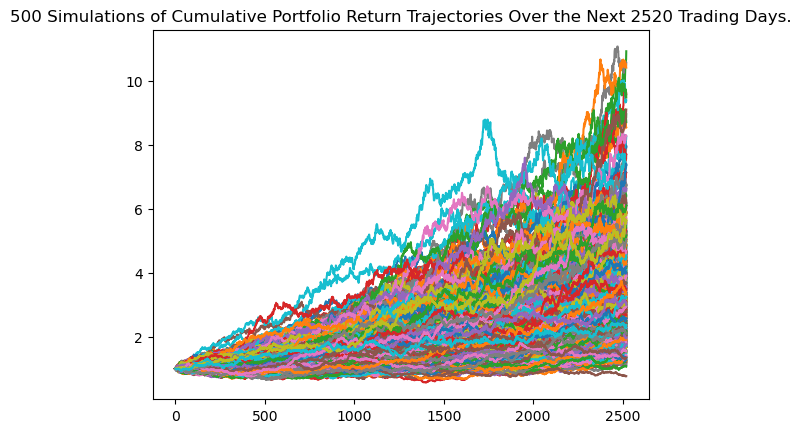

In [40]:
# Plot simulation outcomes
MC_dist_ten.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

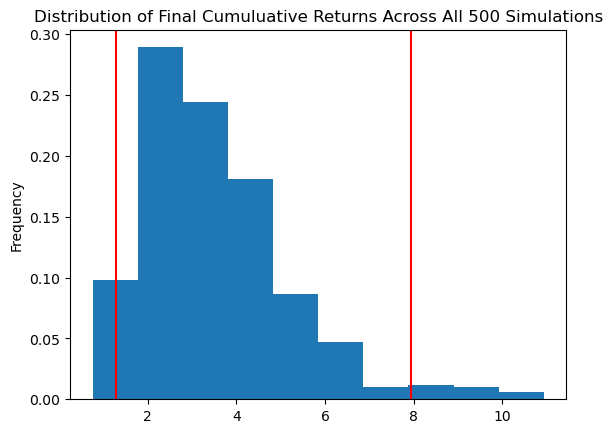

In [41]:
# Plot probability distribution and confidence intervals
MC_dist_ten.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              3.502177
std               1.655765
min               0.762577
25%               2.307509
50%               3.155722
75%               4.364284
max              10.931933
95% CI Lower      1.284411
95% CI Upper      7.949474
Name: 2520, dtype: float64


/Users/kyle/Documents/bootcamp/Financial-Planning/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [43]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_five[8]*60000,2)
ci_upper_ten = round(tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $58885.22 and $145542.24
